In [11]:
import pandas as pd
import numpy as np

import scipy.stats as stats  #qq plot
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

In [7]:
df = pd.read_csv('train.csv')

In [8]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
df.drop(columns=['PassengerId','Name','Sex','Pclass','Ticket','SibSp','Cabin','Embarked','Parch'], inplace=True)

In [10]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [12]:
df.isnull().sum()

,0
Survived,0
Age,177
Fare,0


In [13]:
# To fill the missing values in age column
df['Age'].fillna(df['Age'].mean(),inplace=True)

In [14]:
df.isnull().sum()

,0
Survived,0
Age,0
Fare,0


In [15]:
x = df.iloc[:,1:3]
y = df.iloc[:,0]

In [18]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

**Checking that the age column is nrmally distributed or not.**

<ipython-input-24-27a7ab6be137>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train['Age'])


Text(0.5, 1.0, 'Age QQ Plot')

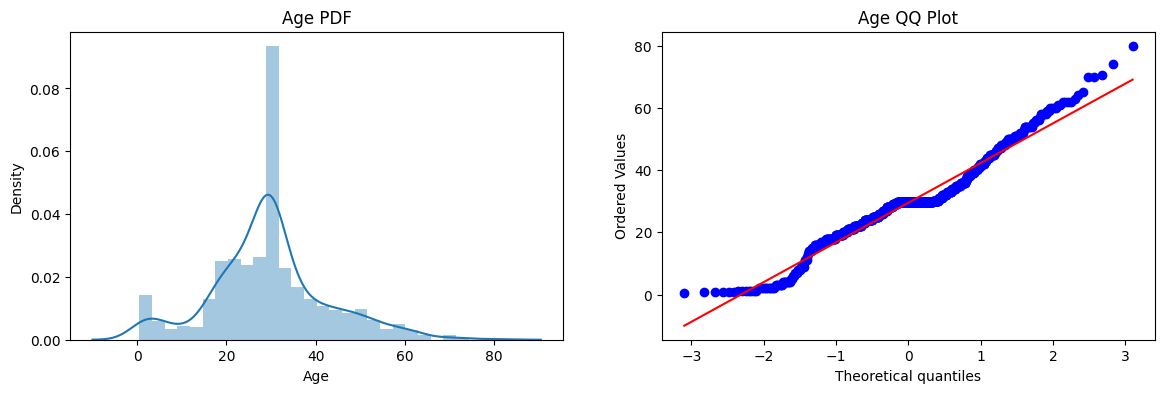

In [24]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(x_train['Age'])
plt.title('Age PDF')

plt.subplot(122)
stats.probplot(x_train['Age'],dist="norm",plot=plt)
plt.title('Age QQ Plot')

**Fare is right skewed -- Log transformer will be used here.**

<ipython-input-25-f4fb46d4cf3e>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train['Fare'])


Text(0.5, 1.0, 'Fare QQ Plot')

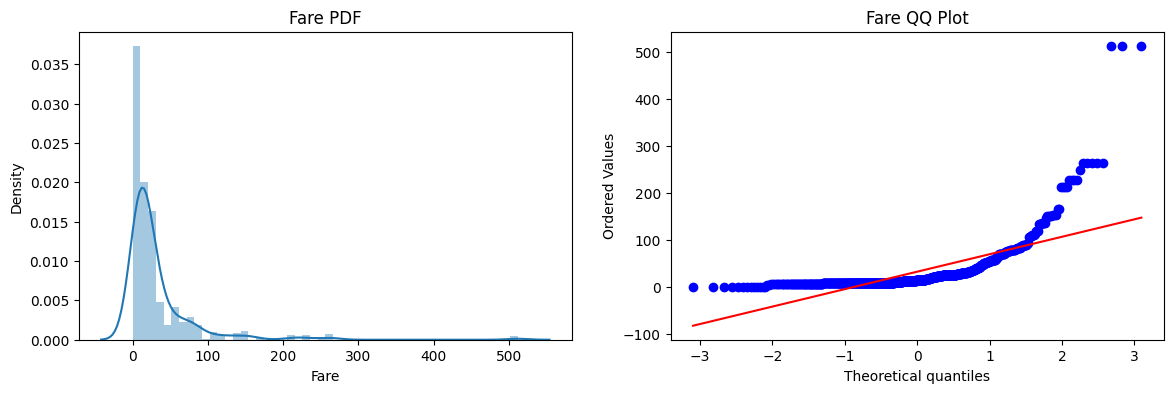

In [25]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(x_train['Fare'])
plt.title('Fare PDF')

plt.subplot(122)
stats.probplot(x_train['Fare'],dist="norm",plot=plt)
plt.title('Fare QQ Plot')

**Accuracy of both the model without any transformation.**

In [26]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

In [28]:
clf.fit(x_train,y_train)
clf2.fit(x_train,y_train)

y_pred1 = clf.predict(x_test)
y_pred2 = clf2.predict(x_test)

print(f"Accuracy score of Logistic Regression: {accuracy_score(y_pred1,y_test)*100}")
print(f"Accuracy score of Decission Tree: {accuracy_score(y_pred2,y_test)*100}")

Accuracy score of Logistic Regression: 64.80446927374301
Accuracy score of Decission Tree: 68.15642458100558


**Accuracy of both the models after applying Log Transformer.**

In [29]:
trf = FunctionTransformer(func=np.log1p)

In [30]:
x_train_transformed = trf.fit_transform(x_train)
x_test_transformed = trf.fit_transform(x_test)

In [32]:
clf.fit(x_train_transformed,y_train)
clf2.fit(x_train_transformed,y_train)

y_pred1 = clf.predict(x_test_transformed)
y_pred2 = clf2.predict(x_test_transformed)

print(f"Accuracy score of Logistic Regression: {accuracy_score(y_pred1,y_test)*100}")
print(f"Accuracy score of Decission Tree: {accuracy_score(y_pred2,y_test)*100}")

Accuracy score of Logistic Regression: 68.15642458100558
Accuracy score of Decission Tree: 67.59776536312849


**We can see that the fare distribution after is better than before.**

Text(0.5, 1.0, 'Fare QQ Plot after')

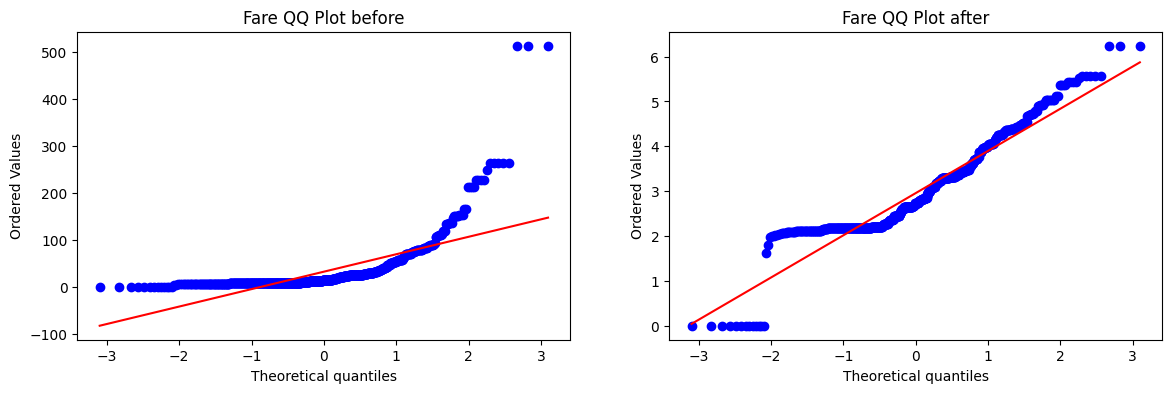

In [35]:
plt.figure(figsize=(14,4))
plt.subplot(121)
stats.probplot(x_train['Fare'],dist="norm",plot=plt)
plt.title('Fare QQ Plot before')

plt.subplot(122)
stats.probplot(x_train_transformed['Fare'],dist="norm",plot=plt)
plt.title('Fare QQ Plot after')

**We can see that the age distribution before is better than after.**

Text(0.5, 1.0, 'Age QQ Plot after')

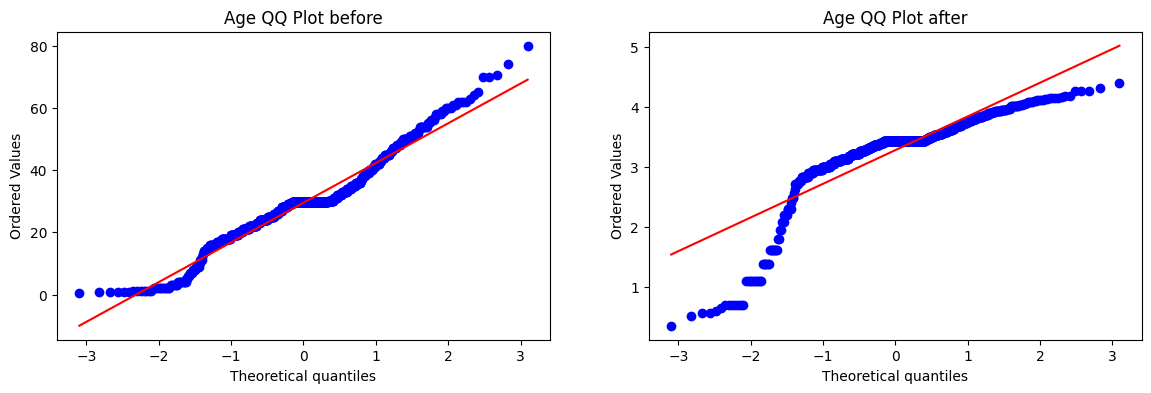

In [36]:
plt.figure(figsize=(14,4))
plt.subplot(121)
stats.probplot(x_train['Age'],dist="norm",plot=plt)
plt.title('Age QQ Plot before')

plt.subplot(122)
stats.probplot(x_train_transformed['Age'],dist="norm",plot=plt)
plt.title('Age QQ Plot after')

**Now applying Log Transformation to fare column only**

In [37]:
trf2 = ColumnTransformer([('log',FunctionTransformer(np.log1p),['Fare'])],remainder='passthrough')

x_train_trans = trf2.fit_transform(x_train)
x_test_trans = trf2.fit_transform(x_test)

In [41]:
clf.fit(x_train_trans,y_train)
clf2.fit(x_train_trans,y_train)

y_pred1 = clf.predict(x_test_trans)
y_pred2 = clf2.predict(x_test_trans)

print(f"Accuracy score of Logistic Regression: {accuracy_score(y_pred1,y_test)*100}")
print(f"Accuracy score of Decission Tree: {accuracy_score(y_pred2,y_test)*100}")

Accuracy score of Logistic Regression: 67.0391061452514
Accuracy score of Decission Tree: 68.71508379888269
